In [45]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df = pd.read_csv('data/polished3.csv')
used_columns = ["Height", "BMI", "Age"]
bio_by_sport = df.groupby(['Event'])[used_columns].median().reset_index()

In [46]:
AVG_HEIGHT = 162
AVG_BMI = 24.5
AVG_AGE = 31

bio_by_sport = bio_by_sport._append({'Event': 'Global average',
                                      'Height': AVG_HEIGHT,
                                        'BMI': AVG_BMI,
                                          'Age': AVG_AGE}, ignore_index=True)
bio_by_sport.head()

,Event,Height,BMI,Age
0,Archery Men's Individual,178.0,23.671254,26.0
1,Archery Men's Team,180.0,23.766410,25.0
2,Archery Women's Individual,168.0,21.671258,25.0
3,Archery Women's Team,168.0,21.967120,24.0
4,"Athletics Men's 1,500 metres",178.0,20.661157,24.0


In [47]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Height', 'BMI', 'Age']

scaler = StandardScaler()

bio_by_sport[columns_to_normalize] = scaler.fit_transform(bio_by_sport[columns_to_normalize])

bio_by_sport.head()

,Event,Height,BMI,Age
0,Archery Men's Individual,0.428439,0.247949,0.236365
1,Archery Men's Team,0.672476,0.281493,-0.062831
2,Archery Women's Individual,-0.791750,-0.457080,-0.062831
3,Archery Women's Team,-0.791750,-0.352784,-0.362027
4,"Athletics Men's 1,500 metres",0.428439,-0.813156,-0.362027


In [48]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['Height', 'Age', 'BMI']])
    score = silhouette_score(bio_by_sport[['Height', 'Age', 'BMI']], clusters)
    silhouette_scores.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
7,9,0.282221
8,10,0.284072
6,8,0.294117
4,6,0.300121
5,7,0.306010
0,2,0.329260
1,3,0.339078
3,5,0.370195
2,4,0.383278


In [51]:
kmeans = KMeans(n_clusters=9, random_state=42)
bio_by_sport['Cluster'] = kmeans.fit_predict(bio_by_sport[used_columns])
bio_by_sport.sort_values(by='Cluster')

,Event,Height,BMI,Age,Cluster
16,Athletics Men's 4 x 400 metres Relay,0.672476,-0.308350,-0.362027,0
17,Athletics Men's 400 metres,0.672476,-0.287383,-0.362027,0
20,"Athletics Men's 5,000 metres",0.062382,-0.975908,-0.062831,0
24,Athletics Men's 800 metres,0.550457,-0.698061,-0.362027,0
341,Taekwondo Women's Welterweight,0.062382,-0.384359,-0.362027,0
340,Taekwondo Women's Heavyweight,0.428439,0.006174,-0.362027,0
354,Water Polo Women's Water Polo,0.062382,-0.226120,-0.062831,0
352,Volleyball Women's Volleyball,0.672476,-0.558364,-0.362027,0
346,Tennis Women's Singles,-0.303674,-0.777874,-0.661223,0
334,Taekwondo Men's Featherweight,0.428439,-0.544265,-0.511625,0


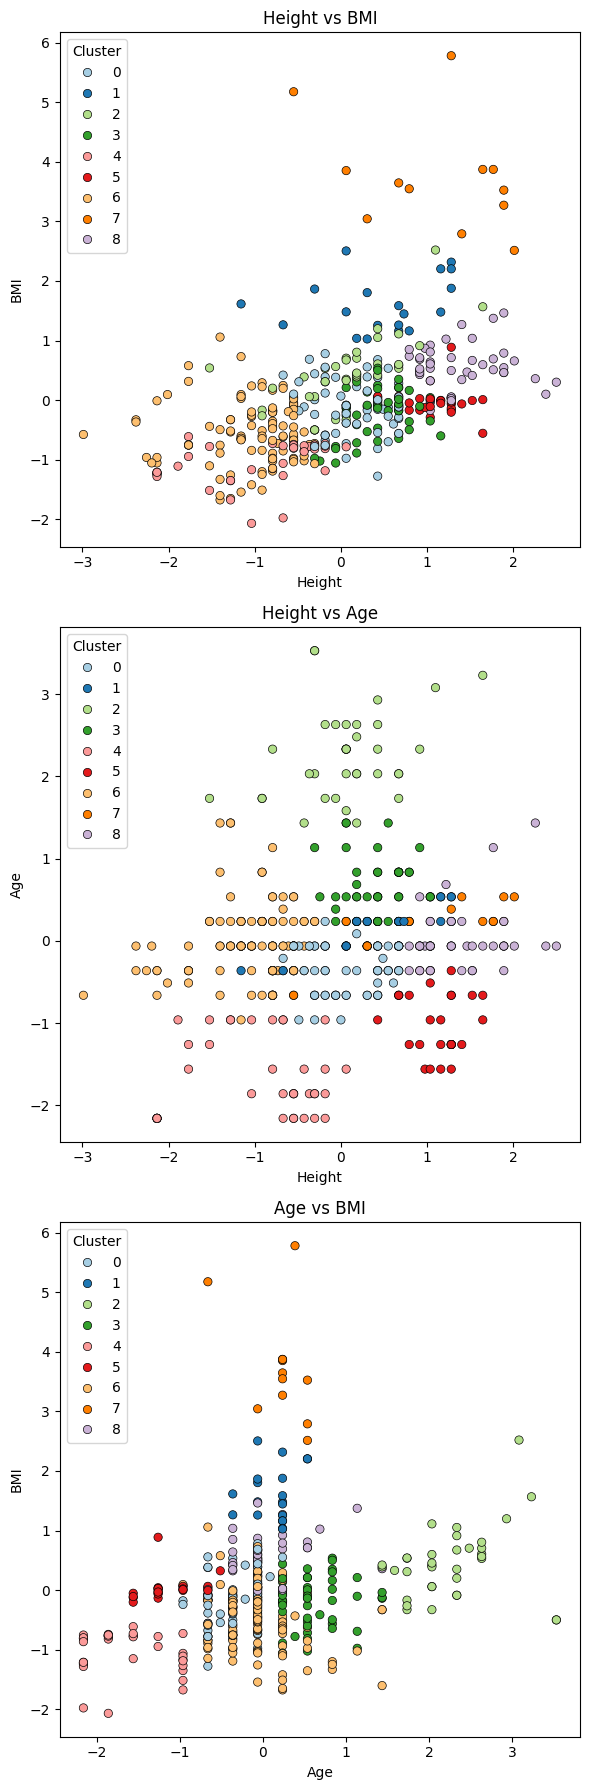

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=bio_by_sport, x='Height', y='BMI', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[0])
axes[0].set_title('Height vs BMI')

sns.scatterplot(data=bio_by_sport, x='Height', y='Age', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[1])
axes[1].set_title('Height vs Age')

sns.scatterplot(data=bio_by_sport, x='Age', y='BMI', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[2])
axes[2].set_title('Age vs BMI')

plt.tight_layout()
plt.show()

In [55]:
import numpy as  np

target_row = bio_by_sport.loc[bio_by_sport['Event'] == 'Global average']

bio_by_sport['distance'] = bio_by_sport[used_columns].apply(
    lambda row: np.linalg.norm(row.values - target_row[used_columns].values), axis=1
)

df_sorted = bio_by_sport.sort_values(by='distance').reset_index(drop=True)

print(df_sorted[["Event", "Cluster", "distance"]])

                                                 Event  Cluster  distance
0                                       Global average        2  0.000000
1                         Shooting Women's Double Trap        2  0.934662
2          Shooting Women's Sporting Pistol, 25 metres        6  0.949718
3               Shooting Women's Air Pistol, 10 metres        6  0.950819
4                                Shooting Women's Trap        2  1.004615
5                               Shooting Women's Skeet        2  1.008438
6       Canoeing Men's Canadian Doubles, 10,000 metres        2  1.148018
7                    Equestrianism Men's Jumping, Team        2  1.290333
8              Equestrianism Men's Jumping, Individual        2  1.345408
9    Shooting Men's Free Rifle, Three Positions, 30...        2  1.361772
10               Sailing Women's Three Person Keelboat        6  1.554916
11   Shooting Mixed Small-Bore Rifle, Three Positio...        2  1.606936
12               Shooting Mixed Free P